In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

import warnings as wr
wr.filterwarnings ('ignore')

In [9]:
df = pd.read_csv('Height-Weight Data.csv') 

df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [10]:
df.shape

(3501, 2)

Text(0.5, 1.0, 'MEASSURING THE ETC')

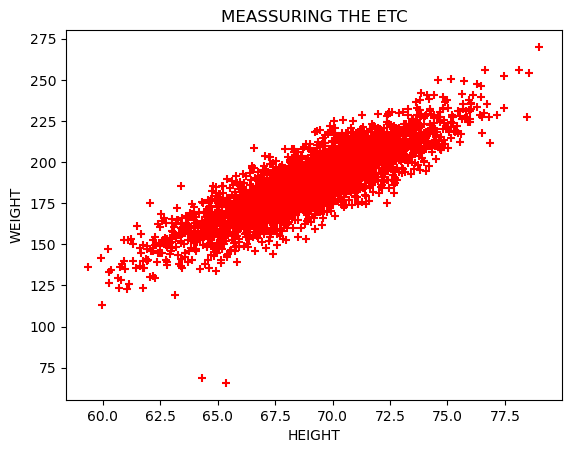

In [11]:
plt.scatter(df.Height , df.Weight, color= 'red',marker ='+')
plt.xlabel('HEIGHT')
plt.ylabel('WEIGHT')
plt.title('MEASSURING THE ETC')

In [12]:
x = df.drop('Weight', axis=1)
y = df[['Weight']]

In [13]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [14]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [15]:
y.shape

(3501, 1)

In [16]:
y.mean()

Weight    186.891258
dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0) #testing data=25%

In [19]:
xtrain.head()

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [20]:
ytrain.head()

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


In [21]:

df[1:20]

,Height,Weight
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676
10,71.195382,186.604926


In [22]:
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(xtrain, ytrain) # training the model

LinearRegression()

In [25]:
m = lr.coef_
m

array([[5.96613032]])

In [26]:
c = lr.intercept_
c

array([-224.98706384])

In [27]:
yp=(m*68.00)+c
yp

array([[180.70979807]])

In [28]:
yp=(m*70.00)+c
yp

array([[192.64205872]])

In [29]:
lr.predict([[70.00]])

array([[192.64205872]])

In [30]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [31]:
df['predicted_Weight'] = lr.predict(x)
df.head()

,Height,Weight,predicted_Weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


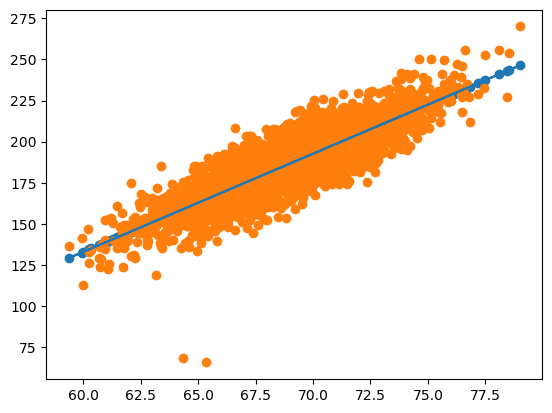

In [41]:
plt.plot(x, df[['predicted_Weight']])      # plt.plot(x.squeeze(), df[['predicted_rent']])
plt.scatter(x, df[['predicted_Weight']])
plt.scatter(x, df[['Weight']])

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [46]:
mae

8.145588569833935

In [47]:
mse

103.70875574105973

In [48]:
lr.score(xtest, ytest)

0.7400625947962998

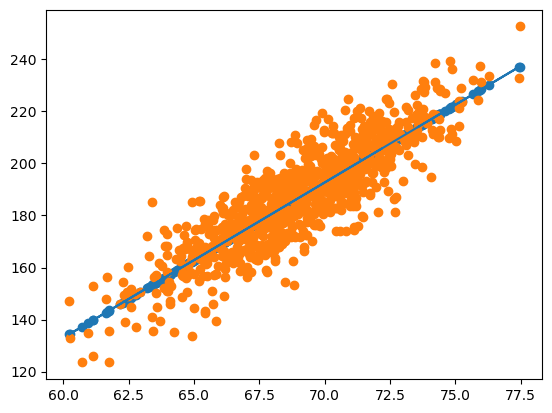

In [49]:
plt.plot(xtest, lr.predict(xtest))      # plt.plot(x.squeeze(), df[['predicted_Weight']])
plt.scatter(xtest, lr.predict(xtest))
#plt.scatter(x, df[['Weight']])
plt.scatter(xtest, ytest)